<a href="https://colab.research.google.com/github/skiym-aaa/practice-kaggle/blob/master/%E7%89%B9%E5%BE%B4%E9%87%8F%E3%82%A8%E3%83%B3%E3%82%B8%E3%83%8B%E3%83%AA%E3%83%B3%E3%82%B0%E3%81%AE%E5%89%8D%E6%BA%96%E5%82%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import xgboost as xgb

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# trainの前処理
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Cabin"] = df_train["Cabin"].fillna(df_train["Cabin"].mode()[0])
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])
df_train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df_train["Sex"] = df_train["Sex"].replace({"male": 0, "female": 1})
df_train = pd.get_dummies(df_train)

# 説明変数、目的変数への分割
train_y = df_train["Survived"]
train_x = df_train.drop("Survived", axis=1)

# 機械学習アルゴリズムの宣言と学習
clf = xgb.XGBClassifier()
clf.fit(train_x, train_y)

# testの前処理
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())
df_test["Cabin"] = df_test["Cabin"].fillna(df_test["Cabin"].mode()[0])
df_test.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df_test["Sex"] = df_test["Sex"].replace({"male": 0, "female": 1})
df_test = pd.get_dummies(df_test)
test_x = df_test # testにSurvived列はないのでdrop不要

# 予測
result = clf.predict(test_x)
pd.DataFrame({
    "PassengerId": test_x["PassengerId"],
    "Survived": result
}).to_csv("result.csv", index=False)

# Google Colab でデータダウンロードに必要
from google.colab import files
files.download("result.csv") # 出力なし（ダウンロード画面の起動）

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("--train--")
for col in df_train.columns:
    if df_train[col].isnull().any():
        print(col, df_train[col].isnull().any())

print("--test--")
for col in df_test.columns:
    if df_test[col].isnull().any():
        print(col, df_test[col].isnull().any())

--train--
Age True
Cabin True
Embarked True
--test--
Age True
Fare True
Cabin True


In [7]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Cabin"] = df_train["Cabin"].fillna(df_train["Cabin"].mode()[0])
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())
df_test["Cabin"] = df_test["Cabin"].fillna(df_test["Cabin"].mode()[0])

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [8]:
print("--train--")
for col in df_train.columns:
    if df_train[col].isnull().any():
        print(col, df_train[col].isnull().any())

print("--test--")
for col in df_test.columns:
    if df_test[col].isnull().any():
        print(col, df_test[col].isnull().any())

--train--
--test--


In [9]:
df_train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

df_train["Sex"] = df_train["Sex"].replace({"male": 0, "female": 1})

df_train = pd.get_dummies(df_train)

In [10]:
import pandas as pd
from IPython.display import display

df = pd.DataFrame({
    "category": ["A", "A", "B"],
    "columns1": [1, 2, 3],
    "columns2": [2, 4, 6]
})

print("ダミー変数化前")
display(df)

print("ダミー変数化後")
display(pd.get_dummies(df))

ダミー変数化前


,category,columns1,columns2
0,A,1,2
1,A,2,4
2,B,3,6


ダミー変数化後


,columns1,columns2,category_A,category_B
0,1,2,1,0
1,2,4,1,0
2,3,6,0,1


In [11]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

df_train = pd.read_csv("train.csv")

# 欠損値を埋める
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Cabin"] = df_train["Cabin"].fillna(df_train["Cabin"].mode())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode())

# train
df_train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df_train["Sex"] = df_train["Sex"].replace({"male": 0, "female": 1})
df_train = pd.get_dummies(df_train)

train_y = df_train["Survived"]
train_x = df_train.drop("Survived", axis=1)

clf = xgb.XGBClassifier()
clf.fit(train_x, train_y)

accuracies = []
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
for train_idx, test_idx in cv.split(train_x, train_y):
    trn_x = train_x.iloc[train_idx, :]
    val_x = train_x.iloc[test_idx, :]

    trn_y = train_y.iloc[train_idx]
    val_y = train_y.iloc[test_idx]

    clf = xgb.XGBClassifier()
    clf.fit(trn_x, trn_y)

    pred_y = clf.predict(val_x)
    accuracies.append(accuracy_score(val_y, pred_y))

print(np.mean(accuracies))

0.8136924803591471


0.8136924803591471


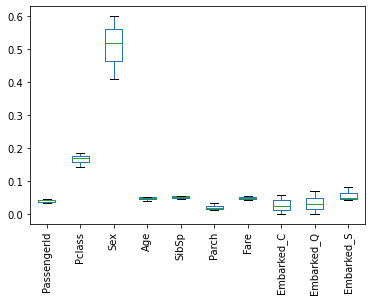

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

df_train = pd.read_csv("train.csv")

# 欠損値を埋める
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Cabin"] = df_train["Cabin"].fillna(df_train["Cabin"].mode())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode())

# train
df_train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df_train["Sex"] = df_train["Sex"].replace({"male": 0, "female": 1})
df_train = pd.get_dummies(df_train)

train_y = df_train["Survived"]
train_x = df_train.drop("Survived", axis=1)

clf = xgb.XGBClassifier()
clf.fit(train_x, train_y)

accuracies = []
feature_importances = []
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
for train_idx, test_idx in cv.split(train_x, train_y):
    trn_x = train_x.iloc[train_idx, :]
    val_x = train_x.iloc[test_idx, :]

    trn_y = train_y.iloc[train_idx]
    val_y = train_y.iloc[test_idx]

    clf = xgb.XGBClassifier()
    clf.fit(trn_x, trn_y)

    pred_y = clf.predict(val_x)
    accuracies.append(accuracy_score(val_y, pred_y))
    feature_importances.append(clf.feature_importances_)

print(np.mean(accuracies))

df_fimp = pd.DataFrame(feature_importances, columns=train_x.columns)
df_fimp.plot(kind="box", rot=90)

In [13]:
import pandas as pd
import seaborn as sns
train = pd.read_csv("train.csv")
train.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


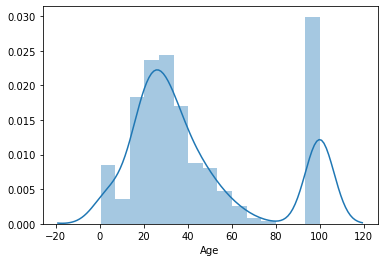

In [14]:
sns.distplot(train["Age"].fillna(100))

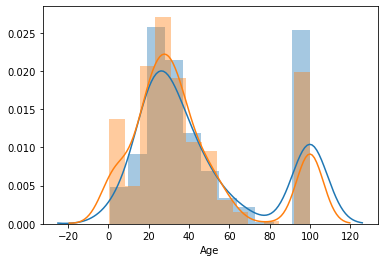

In [15]:
sns.distplot(train.query("Survived == 0")["Age"].fillna(100))
sns.distplot(train.query("Survived == 1")["Age"].fillna(100))

In [19]:
df_train = pd.read_csv("train.csv")

df_train["Sex"] = df_train["Sex"].replace({"male": 0, "female": 1})

df_train = pd.concat([df_train, pd.get_dummies(train["Embarked"])], axis=1)
df_train.drop(["Embarked"], axis=1, inplace=True)

df_train.corr("pearson")["Survived"].to_frame()

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Sex,0.543351
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
C,0.168240
Q,0.003650


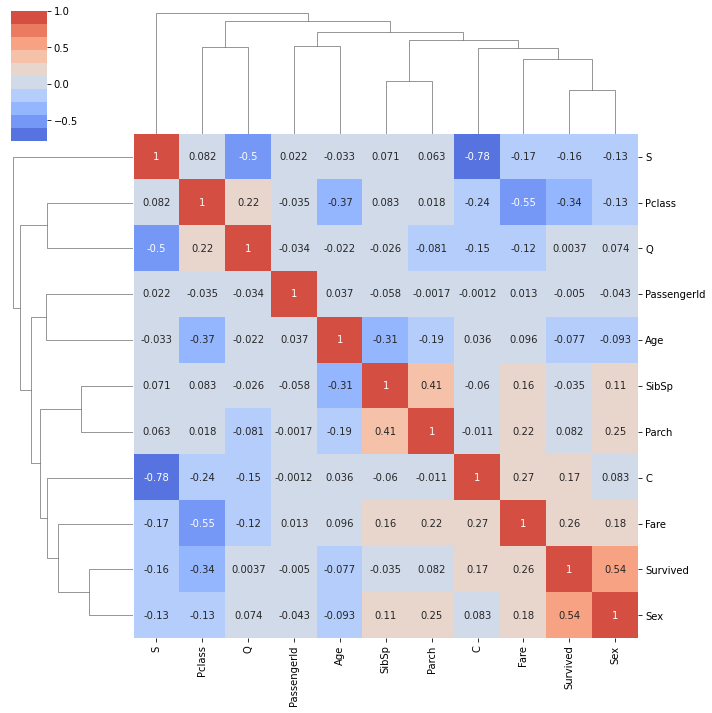

In [20]:
sns.clustermap(df_train.corr("pearson"), annot=True, cmap=sns.color_palette("coolwarm", 10))

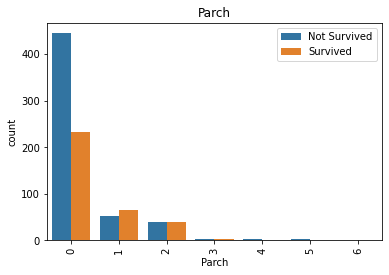

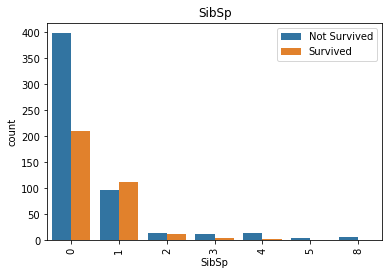

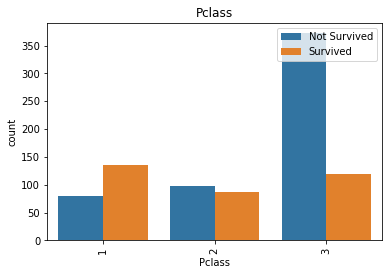

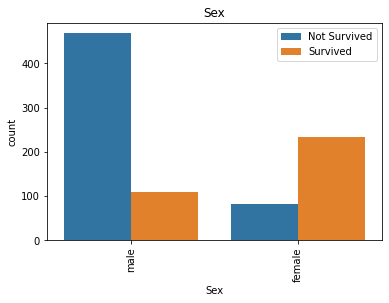

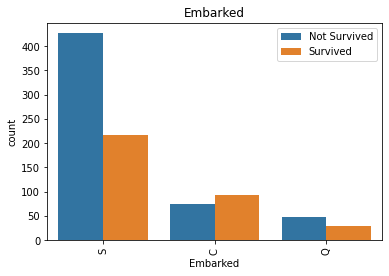

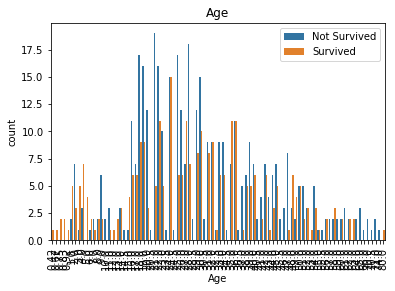

In [23]:
%matplotlib inline
import scipy.stats as st
import matplotlib.pyplot as plt

df_train = pd.read_csv("train.csv")
for col in ['Parch', 'SibSp', 'Pclass', 'Sex', 'Embarked', 'Age']:
    sns.countplot(x=col, hue='Survived', data=df_train)

    plt.xticks(rotation=90)
    plt.title(col)
    plt.legend(['Not Survived', 'Survived'], loc='upper right')
    plt.show()

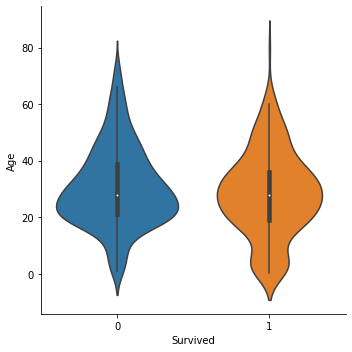

In [24]:
sns.catplot(x="Survived", y="Age", data=df_train, kind='violin')